In [292]:
import sys
import os
user_input = input("Enter the path of your file: ")

Enter the path of your file: 


In [22]:
cant_find=True
while cant_find:
    try:
        assert os.path.exists(user_input), "I did not find the file at, "+str(user_input)
        import PIL.Image
        img = PIL.Image.open(user_input)
        cant_find=False
        print("Succesfully identified {} as file".format(user_input))
    except:
        print("I did not find the file at, "+str(user_input)+"   Try Again")
        user_input = input("Enter the path of your file: ")

Succesfully identified C:\Users\alex2\Desktop\Violin\Violin Code\ViolinMaker-13\Instrument-1\head.jpg as file


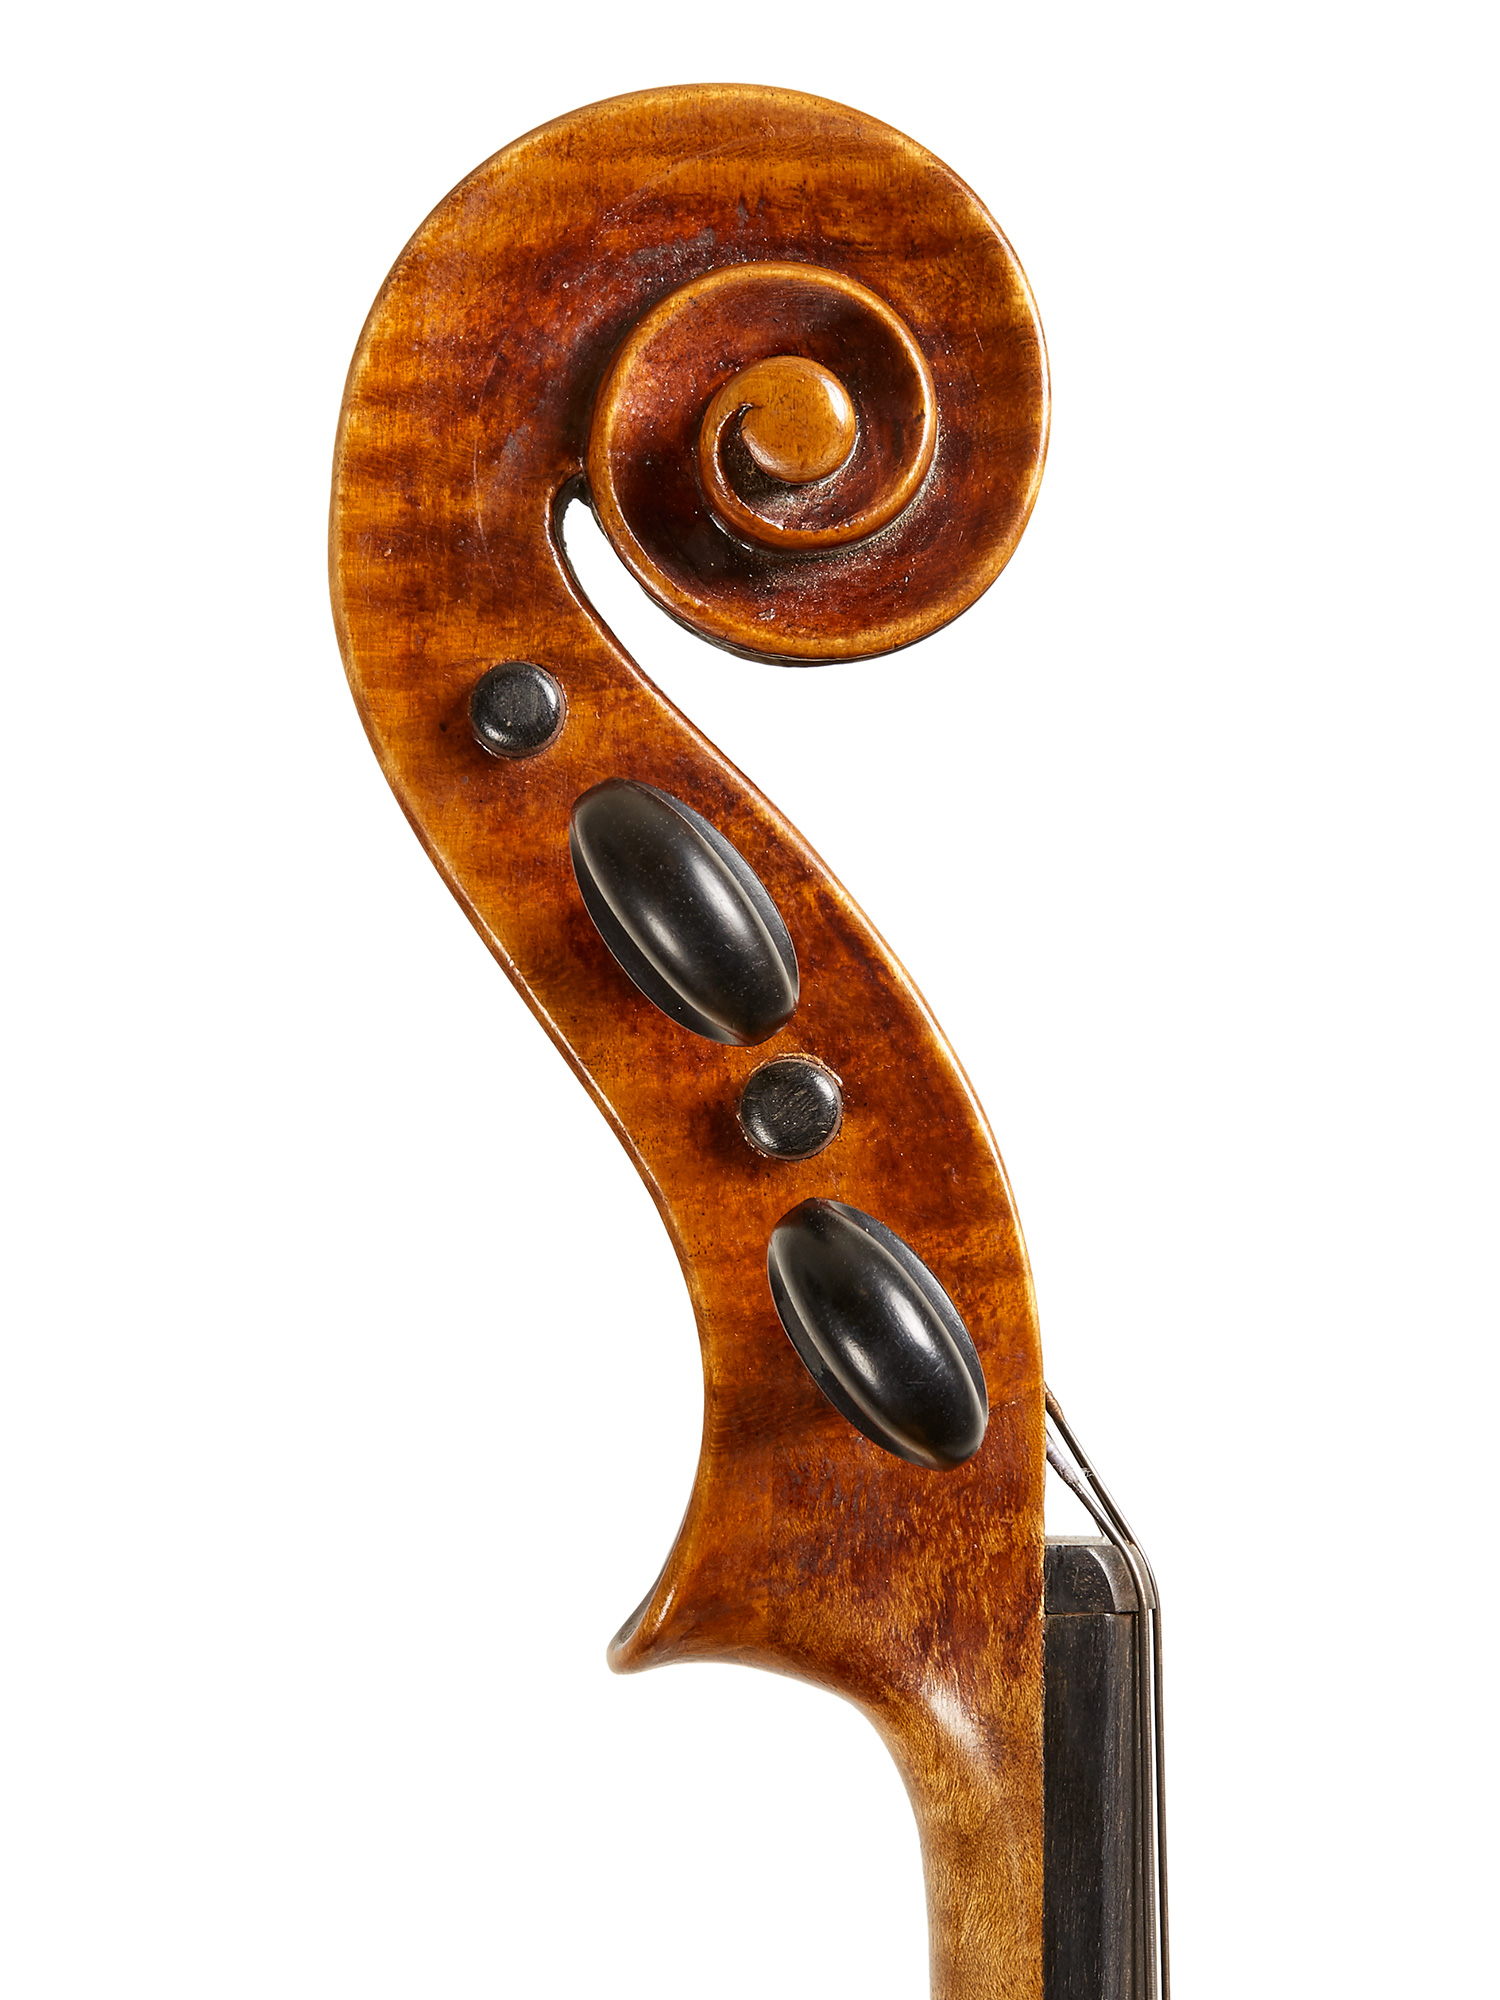

In [23]:
img

In [47]:
newsize = (64, 64) 
img_resized = img.resize(newsize) 
img_resized.show()

In [49]:
import numpy as np

In [293]:
img_array=np.array(img_resized)

In [295]:
import tensorflow as tf

In [296]:
new_model = tf.keras.models.load_model('image_classification.h5')

In [297]:
prediction=new_model.predict(np.expand_dims(img_array, axis=0))

In [298]:
columns_ordered=['Cheap or Trade', 'Proffesional', 'Collectors']
from matplotlib import pyplot as plt
def plot_image(img_array):
    plt.imshow(img_array)
    beg='Predicted tier: '
    beg='Predicted tier: '
    index = prediction.tolist()[0].index(1.0)
    message=beg+str(columns_ordered[index])
    plt.xlabel(message, fontsize=14)
    plt.show()

def plot_guess_histogram(prediction):
    height=prediction.flatten().tolist()
    bars = ('Cheap or Trade', 'Proffesional', 'Collectors')
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height, color=(0.2, 0.4, 0.6))
    plt.title('Predicted Likelyhood of Each Tier')
    plt.xlabel('Instrument Tiers Worst to Best')
    plt.ylabel('Estimated Likelyhood')
    plt.xticks(y_pos, bars, color='grey', rotation=90 ,fontweight='bold', fontsize='12', horizontalalignment='right')


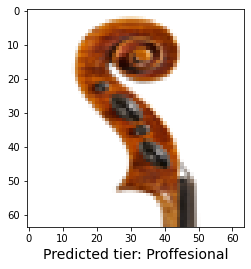

In [305]:
plot_image(img_array)
plt.show()

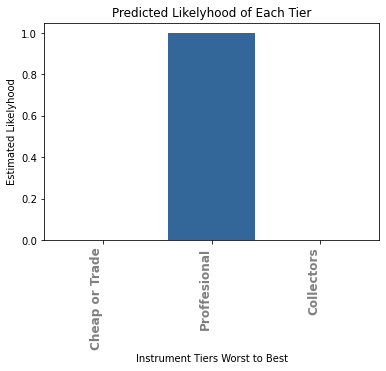

In [306]:
plot_guess_histogram(prediction)
plt.show()